In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from scipy import stats
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
import sklearn
from sklearn.linear_model import LinearRegression
import os 

In [3]:
df = pd.read_csv('pet-diesel-US.csv', delimiter=',')
df.shape


(1361, 14)

In [4]:
df.head(3)

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100


In [5]:
df.tail(3)

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
1358,01/11/2021,2.403,2.298,2.610,2.317,2.232,2.498,2.702,2.550,2.927,2.959,2.839,3.101,2.670
1359,01/18/2021,2.464,2.351,2.688,2.379,2.285,2.579,2.759,2.601,2.995,3.014,2.885,3.166,2.696
1360,01/25/2021,2.478,2.363,2.703,2.392,2.298,2.593,2.776,2.615,3.014,3.033,2.900,3.191,2.716


In [6]:
filter = df['Date'] != '01/25/2021'
df_today = df.drop(df[filter].index, inplace=False)
df_today

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
1360,01/25/2021,2.478,2.363,2.703,2.392,2.298,2.593,2.776,2.615,3.014,3.033,2.9,3.191,2.716


In [7]:
df_diesel = df.drop(columns=['A1',
       'A2',
       'A3',
       'R1',
       'R2',
       'R3',
       'M1',
       'M2',
       'M3',
       'P1',
       'P2',
       'P3'])
df_diesel.tail(3)

,Date,D1
1358,01/11/2021,2.670
1359,01/18/2021,2.696
1360,01/25/2021,2.716


In [8]:
df_diesel.rename( columns={'D1':'Diesel'}, inplace=True )
df_diesel.tail(3)

,Date,Diesel
1358,01/11/2021,2.670
1359,01/18/2021,2.696
1360,01/25/2021,2.716


In [9]:
df_diesel.columns

Index(['Date', 'Diesel'], dtype='object')

In [10]:
df_diesel[~df_diesel.Date.str.contains("1995")]
df_diesel[~df_diesel.Date.str.contains("1996")]
df_diesel[~df_diesel.Date.str.contains("1997")]
df_diesel[~df_diesel.Date.str.contains("1998")]
df_diesel[~df_diesel.Date.str.contains("1999")]
df_diesel[~df_diesel.Date.str.contains("2000")]
df_diesel[~df_diesel.Date.str.contains("2001")]
df_diesel[~df_diesel.Date.str.contains("2002")]
df_diesel[~df_diesel.Date.str.contains("2003")]
df_diesel[~df_diesel.Date.str.contains("2004")]
df_diesel[~df_diesel.Date.str.contains("2005")]
df_diesel[~df_diesel.Date.str.contains("2006")]
df_diesel[~df_diesel.Date.str.contains("2007")]
df_diesel[~df_diesel.Date.str.contains("2008")]
df_diesel[~df_diesel.Date.str.contains("2009")]
df_diesel[~df_diesel.Date.str.contains("2010")]
df_diesel[~df_diesel.Date.str.contains("2011")]
df_diesel[~df_diesel.Date.str.contains("2012")]
df_diesel[~df_diesel.Date.str.contains("2013")]
df_diesel[~df_diesel.Date.str.contains("2014")]
df_diesel[~df_diesel.Date.str.contains("2015")]
df_diesel[~df_diesel.Date.str.contains("2016")]
df_diesel[~df_diesel.Date.str.contains("2017")]
df_diesel[~df_diesel.Date.str.contains("2018")]
df_diesel[~df_diesel.Date.str.contains("2019")]
df_diesel[~df_diesel.Date.str.contains("2020")]
df_diesel.tail(3)

,Date,Diesel
1358,01/11/2021,2.670
1359,01/18/2021,2.696
1360,01/25/2021,2.716


In [11]:
df_diesel.dtypes

Date       object
Diesel    float64
dtype: object

In [12]:
df_diesel['Date']= pd.to_datetime(df_diesel['Date'])

In [13]:
df_diesel.dtypes


Date      datetime64[ns]
Diesel           float64
dtype: object

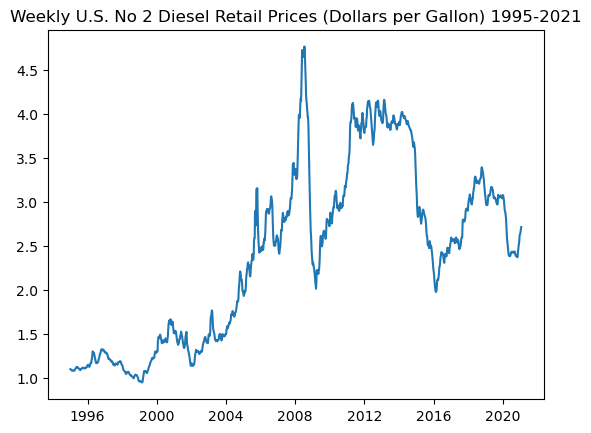

In [14]:
title = 'Weekly U.S. No 2 Diesel Retail Prices (Dollars per Gallon) 1995-2021'
import datetime
import random
import matplotlib.pyplot as plt
col1='Diesel'
col2='Date'
y = df_diesel[col1]
x = df_diesel[col2]
plt.plot(x,y)
plt.gca().set_title(title)
plt.show()


In [15]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
source = ColumnDataSource(df_diesel)
plot = figure(x_axis_type="datetime")
legend_diesel = 'Weekly U.S. No 2 Diesel Retail Prices (Dollars per Gallon) 1995-2021'
plot.line(x='Date', y='Diesel', line_width=1, source=source, color='red', legend_label=legend_diesel)
output_notebook() # show the output in jupyter notebook
show(plot)


Loading BokehJS ...

### Linear Regression

In [16]:
# format = '%Y-%m-%d'
# substring = string[0:4]
df_diesel['Year'] = 0
df_diesel['Year'] = df_diesel['Date'].dt.strftime('%Y').astype(int)
df_diesel.drop(columns=['Date'])
df_diesel.head(3)

,Date,Diesel,Year
0,1995-01-02,1.104,1995
1,1995-01-09,1.102,1995
2,1995-01-16,1.100,1995


In [17]:
df_year = df_diesel[["Year", "Diesel"]].groupby(['Year'],as_index=False).mean()
df_year.tail(10)

,Year,Diesel
17,2012,3.967736
18,2013,3.921731
19,2014,3.824635
20,2015,2.706635
21,2016,2.303942
22,2017,2.650038
23,2018,3.177642
24,2019,3.055827
25,2020,2.550808
26,2021,2.680500


In [18]:
df_year.dtypes

Year        int64
Diesel    float64
dtype: object

In [19]:
# Variable transformation is a way to make the data work better in your model. Compare before and after.
df_year['Diesel'] = np.log(df_year['Diesel'])

Predict Weekly U.S. No 2 Diesel Retail Prices (Dollars per Gallon) 1995-2021
$1.4170382971254725 USD


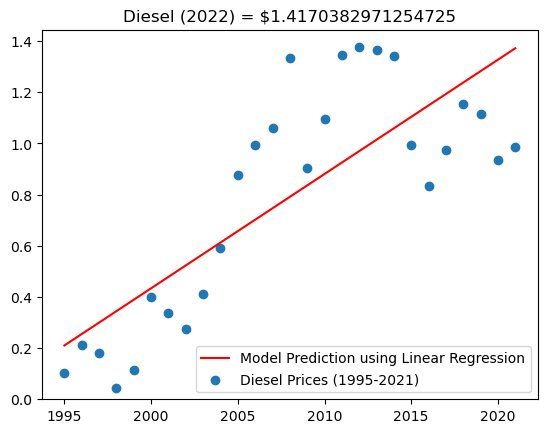

In [20]:
from scipy import stats
X = df_year['Year']
y = df_year['Diesel']
slope, intercept, r, p, std_err = stats.linregress(X, y) # scipy
def modelPrediction(x):
  return slope * x + intercept
label = 'Predict Weekly U.S. No 2 Diesel Retail Prices (Dollars per Gallon) 1995-2021'
model = list(map(modelPrediction, X)) # scipy
x_pred = 2022
y_pred = modelPrediction(x_pred)
print(label)
round(y_pred, 2)
print('${} USD'.format(y_pred))
title='Diesel (2022) = ${}'.format(y_pred)
plt.title(title)
plt.scatter(X, y) # Scatter Plot
plt.plot(X, model, color='red')
plt.ylim(ymin=0) # starts at zero
plt.legend(['Model Prediction using Linear Regression', 'Diesel Prices (1995-2021)'])
plt.show()

Diesel
score = 63.0
coef = [0.04468824]
intercept = -88.94257818186611
SciKit-Learn


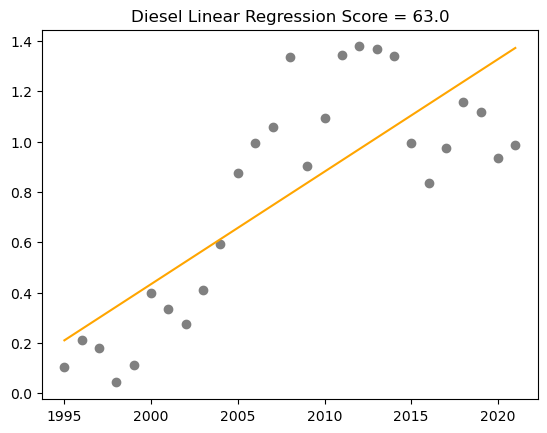

In [21]:
import sklearn
from sklearn.linear_model import LinearRegression
print('Diesel')
x = df_year[['Year']].values
y = df_year['Diesel'].values
regr = sklearn.linear_model.LinearRegression()
model = regr.fit(x,y) # SciKit-Learn
score = regr.score(x, y)
score = round(score*100,2)
title = f"Diesel Linear Regression Score = {score}"
plt.title(title)
print('score = {}'.format(score))
coef = regr.coef_
print('coef = {}'.format(coef)) # 1.0
intercept = regr.intercept_
print('intercept = {}'.format(intercept)) # 3.0000...
y_pred = model.predict(x)
print('SciKit-Learn')
plt.scatter(x, y, color='gray') # sklearn
plt.plot(x, y_pred, color='orange') # model
# plt.ylim(0) # start at zero
plt.show()

- How does Regular gasoline compares with Midgrade or Premium?

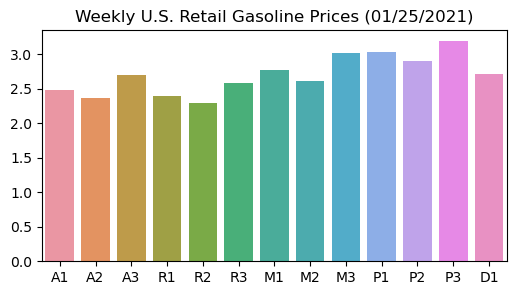

In [22]:
title = 'Weekly U.S. Retail Gasoline Prices (01/25/2021)'
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(6,3))
plt.title(title)
sns.barplot(data=df_today)
plt.show()


In [23]:
title = 'Weekly U.S. Retail Gasoline Prices (01/25/2021)'
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
output_notebook() # output_file("bars.html")
x =['A1',
       'A2',
       'A3',
       'R1',
       'R2',
       'R3',
       'M1',
       'M2',
       'M3',
       'P1',
       'P2',
       'P3',
       'D1']
p = figure(x_range=x, plot_height=250, title=title)
p.vbar(x=x, top=[df_today['A1'].values[0], 
     df_today['A2'].values[0], 
     df_today['A3'].values[0], 
     df_today['R1'].values[0], 
     df_today['R2'].values[0], 
     df_today['R3'].values[0], 
     df_today['M1'].values[0], 
     df_today['M2'].values[0], 
     df_today['M3'].values[0], 
     df_today['P1'].values[0], 
     df_today['P2'].values[0], 
     df_today['P3'].values[0], 
     df_today['D1'].values[0]], width=0.9)
p.xgrid.grid_line_color = None
p.y_range.start = 0
show(p)

Loading BokehJS ...

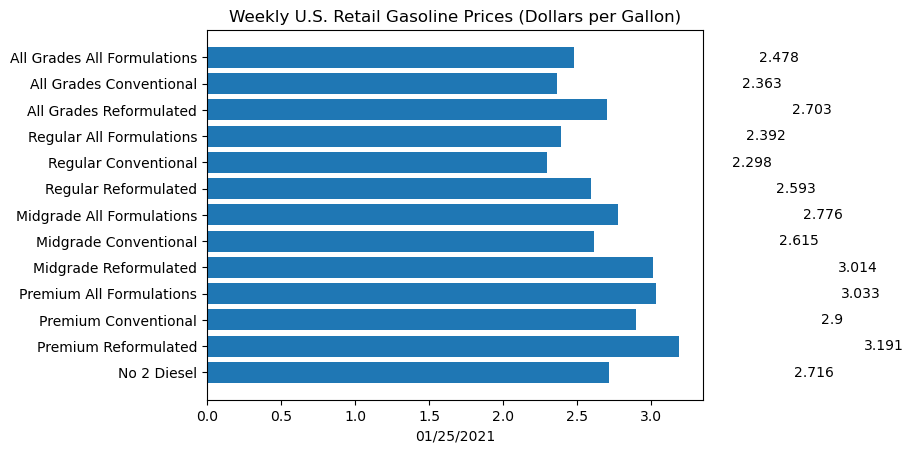

In [24]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
y = ('All Grades All Formulations', 
     'All Grades Conventional', 
     'All Grades Reformulated',
     'Regular All Formulations',
     'Regular Conventional',
     'Regular Reformulated',
     'Midgrade All Formulations',
     'Midgrade Conventional',
     'Midgrade Reformulated',
     'Premium All Formulations',
     'Premium Conventional',
     'Premium Reformulated',
     'No 2 Diesel')
y_pos = np.arange(len(y))
x = (df_today['A1'].values[0], 
     df_today['A2'].values[0], 
     df_today['A3'].values[0], 
     df_today['R1'].values[0], 
     df_today['R2'].values[0], 
     df_today['R3'].values[0], 
     df_today['M1'].values[0], 
     df_today['M2'].values[0], 
     df_today['M3'].values[0], 
     df_today['P1'].values[0], 
     df_today['P2'].values[0], 
     df_today['P3'].values[0], 
     df_today['D1'].values[0])
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('01/25/2021')
ax.set_title('Weekly U.S. Retail Gasoline Prices (Dollars per Gallon)')
for i, v in enumerate(x):
    ax.text(v + 1.25, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

